In [55]:
import pyreadstat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [89]:
original_dataset_x = pd.read_csv('../GNNs/data/COPD/fev1_X.csv', index_col=0)

clinical_variables, _ = pyreadstat.read_sas7bdat("../Data/COPDGene_P1P2P3_SM_NS_Long_Oct22.sas7bdat")
clinical_variables = clinical_variables.set_index('sid')
# Filtering on Visit Number
clinical_variables = clinical_variables[clinical_variables['visitnum'] == 2.0]

complete_original_dataset = pd.merge(clinical_variables, original_dataset_x, left_index=True, right_index=True)
original_dataset = complete_original_dataset[original_dataset_x.columns.tolist() + ['finalgold_visit']]
original_dataset['finalgold_visit'].fillna(0, inplace=True)
original_dataset.drop(original_dataset[original_dataset['finalgold_visit'] == -1].index, inplace=True)

# TODO: Understand the SettingWithCopy Warning
# Merging Classes 0 (No COPD), 1 & 2 -> 1 (Moderate COPD), 3 & 4 -> 2 (Severe COPD)
# original_dataset['finalgold_visit'] = np.where(original_dataset['finalgold_visit'] == 2, 1, original_dataset['finalgold_visit'])
# original_dataset['finalgold_visit'] = np.where((original_dataset['finalgold_visit'] == 3) | (original_dataset['finalgold_visit'] == 4), 2, original_dataset['finalgold_visit'])

synthetic_dataset = pd.read_csv('../SubjectRepresentationScripts/SubjectsSyntheticData/synthetic_data_300_epochs.csv')

/tmp/ipykernel_711897/4187949254.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_dataset['finalgold_visit'].fillna(0, inplace=True)
/tmp/ipykernel_711897/4187949254.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_dataset.drop(original_dataset[original_dataset['finalgold_visit'] == -1].index, inplace=True)


In [82]:
original_dataset.describe()

,(N(1) + N(8))-acetylspermidine,5-acetylamino-6-amino-3-methyluracil,5-hydroxyhexanoate,adrenate (22:4n6),C-glycosyltryptophan,phosphocholine,ergothioneine,myristoleoylcarnitine (C14:1)*,"N2,N2-dimethylguanosine",X - 12026,...,Carbonic anhydrase 6,Kallistatin,Beta-2-microglobulin,C-reactive protein,Growth/differentiation factor 15,"Alpha-(1,3)-fucosyltransferase 5",Trefoil factor 3,Troponin T,N-terminal pro-BNP,finalgold_visit
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,...,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,0.009800,-0.007964,-0.010159,-0.012034,-0.009313,-0.005251,0.018133,0.003134,-0.011747,-0.011560,...,0.025000,-0.004992,-0.040364,-0.039041,-0.036743,-0.019020,-0.033605,-0.020213,-0.028109,1.191372
std,1.003054,1.006619,1.008108,0.986966,1.001872,1.004660,0.998589,1.014265,0.996786,0.989751,...,0.995169,0.992763,0.932619,1.008574,0.966489,0.962860,0.909826,0.971468,0.976830,1.327740
min,-3.107800,-3.257262,-3.152900,-2.404613,-2.277311,-3.335621,-3.860095,-2.890062,-8.538218,-3.026930,...,-3.733669,-4.296591,-2.015025,-5.291019,-2.198620,-3.452951,-1.900185,-2.213590,-2.325935,0.000000
25%,-0.632590,-0.586703,-0.683592,-0.724349,-0.645918,-0.641538,-0.503771,-0.691920,-0.621874,-0.621381,...,-0.602787,-0.611120,-0.693866,-0.599247,-0.698836,-0.633641,-0.633473,-0.659554,-0.736587,0.000000
50%,-0.025435,-0.091508,0.052671,-0.096171,-0.106485,-0.016268,0.096288,-0.011838,-0.071891,0.028553,...,0.069026,-0.020452,-0.167624,0.162651,-0.144904,-0.036463,-0.155403,-0.215135,-0.112904,1.000000
75%,0.590939,0.510634,0.674949,0.604578,0.439654,0.606411,0.635655,0.687075,0.552463,0.573625,...,0.696639,0.557556,0.455841,0.712004,0.482285,0.623627,0.421513,0.382540,0.584657,2.000000
max,5.143729,4.659233,3.343771,3.841943,6.289303,4.210214,2.634370,3.808776,4.193549,3.043065,...,2.683482,3.579618,5.115000,2.130305,4.954579,3.216311,5.134946,6.096734,3.151925,4.000000


In [83]:
synthetic_dataset.describe()

,(N(1) + N(8))-acetylspermidine,5-acetylamino-6-amino-3-methyluracil,5-hydroxyhexanoate,adrenate (22:4n6),C-glycosyltryptophan,phosphocholine,ergothioneine,myristoleoylcarnitine (C14:1)*,"N2,N2-dimethylguanosine",X - 12026,...,Carbonic anhydrase 6,Kallistatin,Beta-2-microglobulin,C-reactive protein,Growth/differentiation factor 15,"Alpha-(1,3)-fucosyltransferase 5",Trefoil factor 3,Troponin T,N-terminal pro-BNP,finalgold_visit
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.576653,-1.072360,-0.962437,-1.420699,-0.144441,0.462119,-1.271036,-0.048572,-0.462517,1.090127,...,-0.741781,0.625787,0.300180,1.020386,-0.195648,-1.522412,0.626445,-0.172995,-0.778233,1.862100
std,1.418691,1.281043,1.255623,0.942348,1.265495,1.302949,1.170089,1.292855,1.211809,1.198959,...,1.451265,1.127181,1.092920,0.927266,1.398915,1.246155,1.348206,1.279312,1.027971,1.406443
min,-4.371616,-4.405648,-4.380959,-3.224436,-4.747718,-4.192640,-5.644508,-3.696703,-3.617173,-4.002517,...,-5.060511,-5.688712,-2.645178,-4.857091,-4.489174,-4.277699,-3.060238,-3.503824,-3.144076,0.000000
25%,-1.580101,-1.800756,-1.764003,-2.117954,-1.028103,-0.416209,-1.756493,-0.923997,-1.369505,0.350065,...,-1.691611,-0.093010,-0.459728,0.592346,-1.180132,-2.331968,-0.308205,-1.059511,-1.528340,1.000000
50%,-0.698987,-0.970917,-0.983034,-1.572372,-0.253621,0.470550,-1.188452,-0.047522,-0.565190,1.104016,...,-0.685909,0.650967,0.229312,1.222823,-0.372856,-1.608978,0.495613,-0.400781,-0.895515,2.000000
75%,0.276452,-0.242317,-0.107528,-0.891576,0.583503,1.343675,-0.558337,0.818937,0.313561,1.801845,...,0.298854,1.309589,0.950440,1.670710,0.560306,-0.737328,1.399555,0.433196,-0.134079,3.000000
max,5.637442,5.527017,3.608374,4.004894,7.547826,5.538057,3.041525,5.907255,6.758283,4.695898,...,3.312726,5.082571,6.157650,3.339877,7.841239,3.665334,7.380932,7.078845,3.755015,4.000000


In [87]:
# Distribution of the Target Variable
original_phenotype_dist = original_dataset['finalgold_visit'].value_counts(normalize=True)
synthetic_phenotype_dist = synthetic_dataset['finalgold_visit'].value_counts(normalize=True)
print("Original Phenotype Distribution:\n", original_phenotype_dist)
print("Synthetic Phenotype Distribution:\n", synthetic_phenotype_dist)

Original Phenotype Distribution:
 finalgold_visit
0.0    0.476770
2.0    0.217920
3.0    0.123894
1.0    0.113938
4.0    0.067478
Name: proportion, dtype: float64
Synthetic Phenotype Distribution:
 finalgold_visit
0.0    0.24375
2.0    0.21260
3.0    0.19330
1.0    0.18670
4.0    0.16365
Name: proportion, dtype: float64


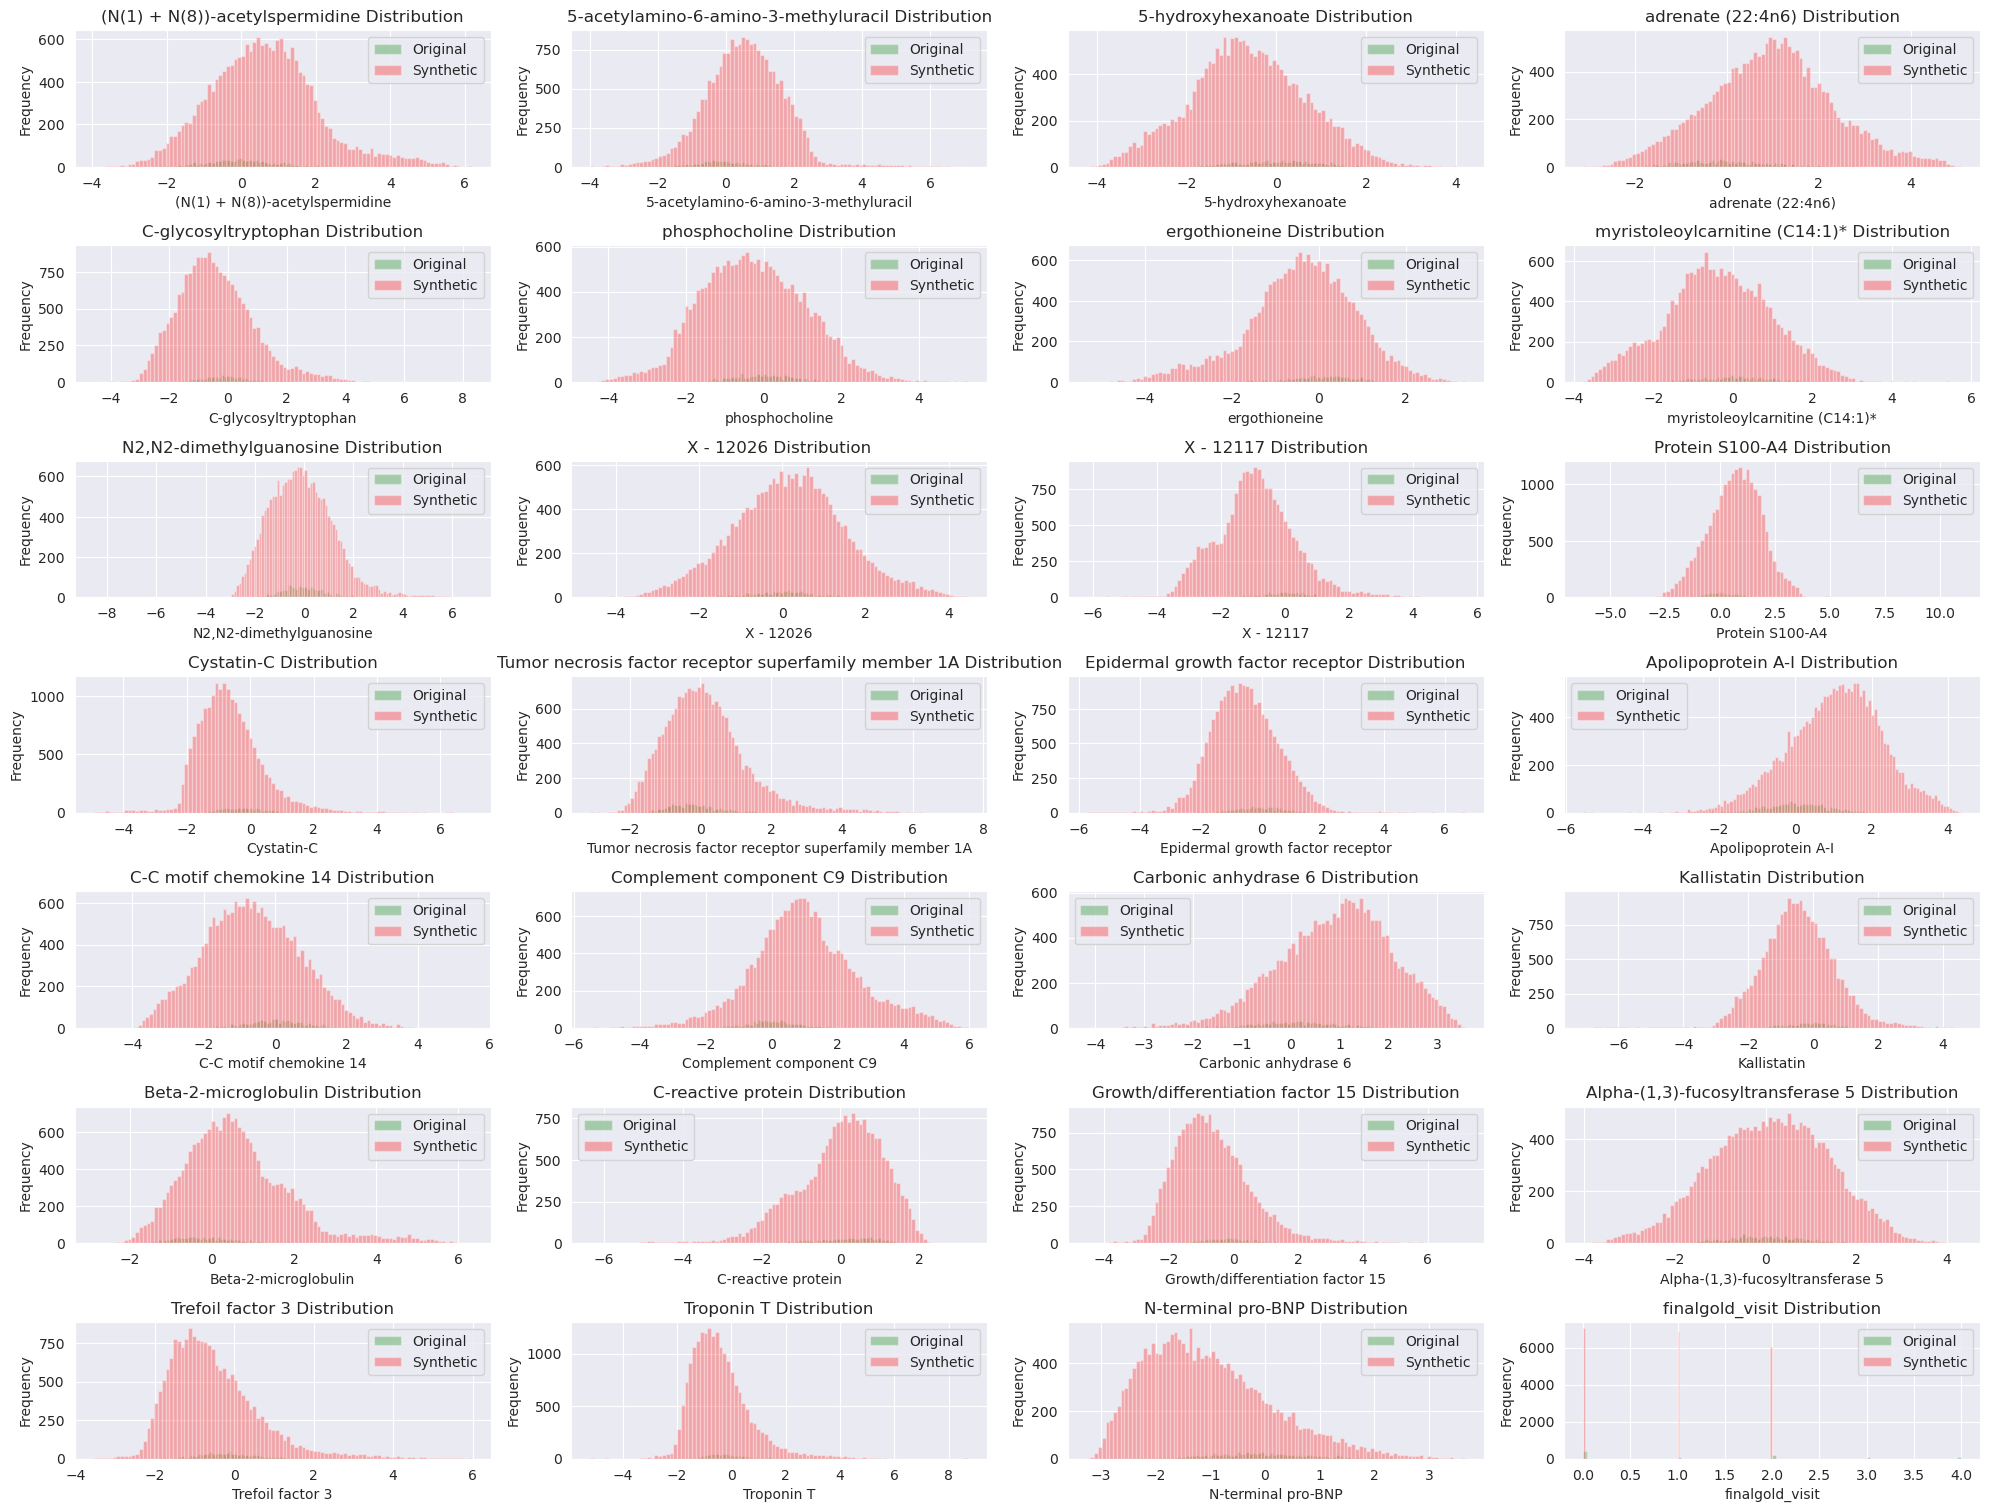

In [90]:

plt.figure(figsize=(20, 60))
for row, col in enumerate(original_dataset.columns):
    plt.subplot(len(original_dataset.columns), 4, row + 1)
    plt.hist(original_dataset[col], bins=100, color='green', alpha=0.3, label='Original')
    plt.hist(synthetic_dataset[col], bins=100, color='red', alpha=0.3, label='Synthetic')
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()